## Setting up my environment

Load libraries.

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

## Read documents

In this analysis I choose to analyze:

-   Mascotas_Hogar_2021_12_08.csv
-   Mascotas_Población_2021_12_08.csv
-   Mascotas_Tipo_2021_12_08.csv

I want to conduct this analysis because I have a fondness for animals, although to be completely honest, I have a stronger preference for cats as they are more independent in my opinion. Regarding the topic at hand, I would like to learn about the **number** of animals present throughout Mexican territory, as well as the most **favored** pet among Mexicans.

In [37]:
dHouse = pd.read_csv('C:/Users/jjlof/Documents/Data Analyst/PetsInMexico/Inegi/Mascotas_Hogar_2021_12_08.csv')
dOwnership = pd.read_csv('C:/Users/jjlof/Documents/Data Analyst/PetsInMexico/Inegi/Mascotas_Población_2021_12_08.csv')
dTypes = pd.read_csv('C:/Users/jjlof/Documents/Data Analyst/PetsInMexico/Inegi/Mascotas_Tipo_2021_12_08.csv')

### Showing house pet data

In [38]:
print(dHouse.head())

               Entidad  Con mascota  Sin mascota    Total
0       Aguascalientes       275117       139195   414312
1      Baja California       833462       435688  1269150
2  Baja California Sur       185140        99808   284948
3             Campeche       210501        65525   276026
4             Coahuila       641655       318452   960107


### Showing data about pet ownership

In [39]:
print(dOwnership.head())

               Entidad  Con mascota  Sin mascota    Total
0       Aguascalientes       710007       318834  1028841
1      Baja California      1937278       900513  2837791
2  Baja California Sur       440107       199801   639908
3             Campeche       527186       138753   665939
4             Coahuila      1636869       700690  2337559


### Showing data about types of pets (ex. hamsters, birds, fishes, etc.)

In [40]:
print(dTypes.head())

               Entidad    Perro    Gato  Otra Especie    Total
0       Aguascalientes   469627  145445        440209  1055281
1      Baja California  1506073  674662        671873  2852608
2  Baja California Sur   343590  148293        188203   680086
3             Campeche   421802  161582        216301   799685
4             Coahuila  1108456  378605        756377  2243438


## Searching duplicate data

After to showing pets activity, I inspected the data to check if duplicate data exists

### Pets data

In [41]:
PH = dHouse[dHouse.duplicated('Entidad')]
print(PH.head())

Empty DataFrame
Columns: [Entidad, Con mascota, Sin mascota, Total]
Index: []


In [42]:
PO = dOwnership[dOwnership.duplicated('Entidad')]
print(PO.head())

Empty DataFrame
Columns: [Entidad, Con mascota, Sin mascota, Total]
Index: []


In [43]:
PT = dTypes[dTypes.duplicated('Entidad')]
print(PT.head())

Empty DataFrame
Columns: [Entidad, Perro, Gato, Otra Especie, Total]
Index: []


Once the search for duplicated information in the files was completed, no duplicate data was found.

Afterwards, we will review the totals of pets and the types of pets that exist within Mexican territory

In [44]:
total_sum_h = dHouse[['Con mascota', 'Sin mascota']].sum()
total_sum_table_h = pd.DataFrame({'Column': ['With pet', 'Non pet'], 'Total': total_sum_h.values})
print(total_sum_table_h)

     Column     Total
0  With pet  26508923
1   Non pet  11909487


Total number of pets per household in Mexico is obtained

In [45]:
total_sum_p = dOwnership[['Con mascota', 'Sin mascota']].sum()
total_sum_table_p = pd.DataFrame({'Column': ['With pet', 'Non pet'], 'Total': total_sum_p.values})
print(total_sum_table_p)

     Column     Total
0  With pet  66159188
1   Non pet  24897273


Total number of pets per mexican population is obtained

In [46]:
total_sum_t = dTypes[['Perro', 'Gato', 'Otra Especie']].sum()
total_sum_table_t = pd.DataFrame({'Column': ['Dog', 'Cat', 'Other Pet'], 'Total': total_sum_t.values})
print(total_sum_table_t)

      Column     Total
0        Dog  47711365
1        Cat  18986535
2  Other Pet  24617509


Total of pets in Mexico is obtained

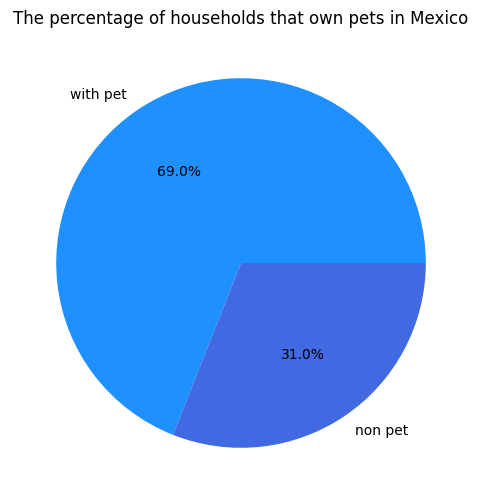

In [47]:
sum_with_pet_h = dHouse['Con mascota'].sum()
sum_non_pet_h = dHouse['Sin mascota'].sum()
total_h = sum_with_pet_h + sum_non_pet_h
porcentage_with_pet_h = (sum_with_pet_h / total_h) * 100
porcentage_non_pet_h = (sum_non_pet_h / total_h) * 100
total_dHouse = pd.DataFrame({
    'Category_h': ['with pet', 'non pet'],
    'Value_h': [sum_with_pet_h, sum_non_pet_h],
    'Porcentage_h': [porcentage_with_pet_h, porcentage_non_pet_h]
})

colors = ['dodgerblue', 'royalblue']
plt.figure(figsize=(8, 6))
plt.pie(total_dHouse['Value_h'], labels=total_dHouse['Category_h'], autopct='%1.1f%%', colors=colors)
plt.title('The percentage of households that own pets in Mexico')
plt.show()

The percentages of Mexican households that have pets and those that do not have pets are observed

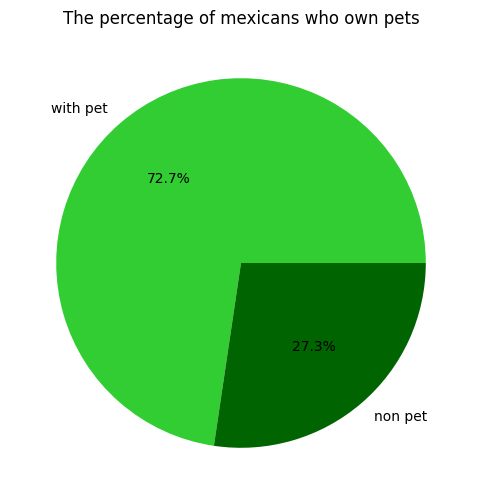

In [48]:
sum_with_pet_p = dOwnership['Con mascota'].sum()
sum_non_pet_p = dOwnership['Sin mascota'].sum()
total_p = sum_with_pet_p + sum_non_pet_p
porcentage_with_pet_p = (sum_with_pet_p / total_p) * 100
porcentage_non_pet_p = (sum_non_pet_p / total_p) * 100
total_dOwnership = pd.DataFrame({
    'Category_p': ['with pet', 'non pet'],
    'Value_p': [sum_with_pet_p, sum_non_pet_p],
    'Porcentage_p': [porcentage_with_pet_p, porcentage_non_pet_p]
})

colors = ['limegreen', 'darkgreen']
plt.figure(figsize=(8, 6))
plt.pie(total_dOwnership['Value_p'], labels=total_dOwnership['Category_p'], autopct='%1.1f%%', colors=colors)
plt.title('The percentage of mexicans who own pets')
plt.show()

The percentages of mexican population that have pets and those that do not have pets are observed

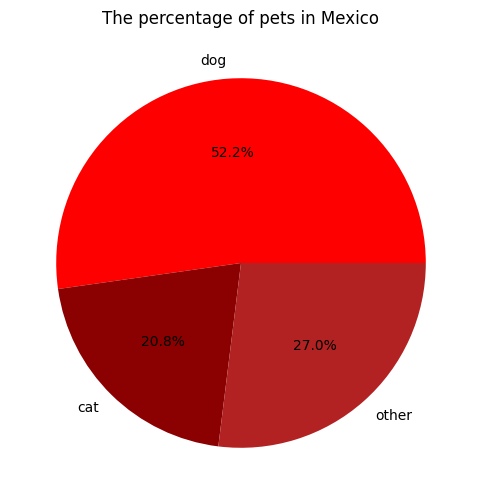

In [49]:
sum_dog = dTypes['Perro'].sum()
sum_cat = dTypes['Gato'].sum()
sum_other = dTypes['Otra Especie'].sum()
total_sum = sum_dog + sum_cat + sum_other
porcentage_dog = (sum_dog / total_sum) * 100
porcentage_cat = (sum_cat / total_sum) * 100
porcentage_other = (sum_other / total_sum) * 100
total_dTypes = pd.DataFrame({
    'Category_t': ['dog', 'cat', 'other'],
    'Value_t': [sum_dog, sum_cat, sum_other],
    'Porcentage_t': [porcentage_dog, porcentage_cat, porcentage_other]
})

colors = ['red', 'darkred', 'firebrick']
plt.figure(figsize=(8, 6))
plt.pie(total_dTypes['Value_t'], labels=total_dTypes['Category_t'], autopct='%1.1f%%', colors=colors)
plt.title('The percentage of pets in Mexico')
plt.show()

The percentages of dogs, cats, and other pets (hamsters, birds, fishes, etc.) inhabiting Mexico are examined

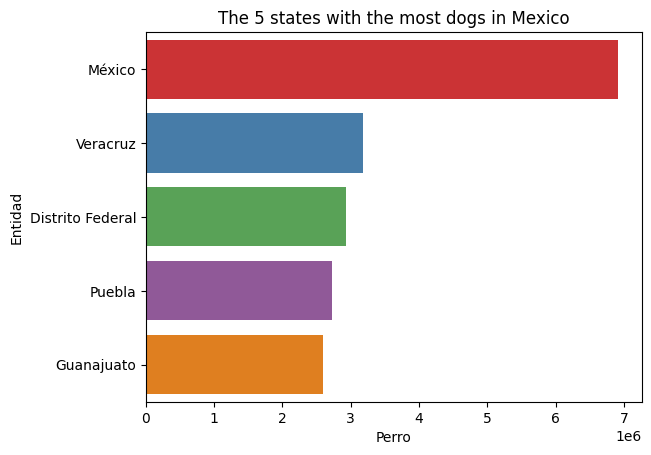

            Entidad    Perro
0            México  6919036
1          Veracruz  3176730
2  Distrito Federal  2932109
3            Puebla  2729657
4        Guanajuato  2586713


In [50]:
top5_dogs = dTypes.groupby('Entidad')['Perro'].sum().nlargest(5).reset_index()
top5_dogs_chart = sns.barplot(x='Perro', y='Entidad', hue='Entidad', data=top5_dogs, palette='Set1', dodge=False, legend=False)
top5_dogs_chart.set_title('The 5 states with the most dogs in Mexico')
plt.show()
print(top5_dogs)

The 5 states with the most dogs in Mexico are shown

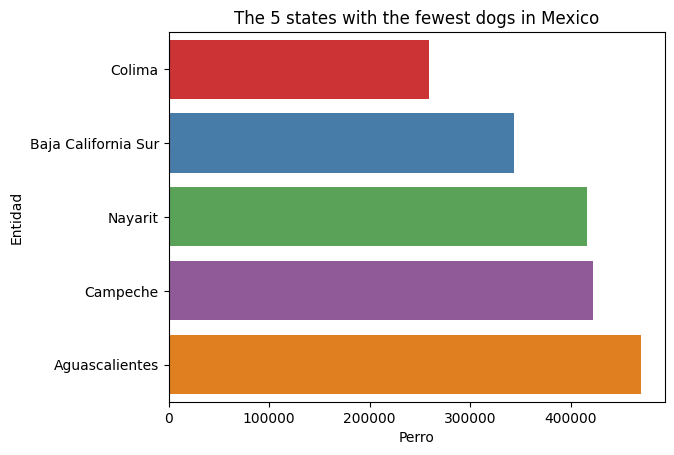

               Entidad   Perro
0               Colima  258895
1  Baja California Sur  343590
2              Nayarit  415563
3             Campeche  421802
4       Aguascalientes  469627


In [51]:
bottom5_dogs = dTypes.groupby('Entidad')['Perro'].sum().nsmallest(5).reset_index()
bottom5_dogs_chart = sns.barplot(x='Perro', y='Entidad', hue='Entidad', data=bottom5_dogs, palette='Set1', dodge=False, legend=False)
bottom5_dogs_chart.set_title('The 5 states with the fewest dogs in Mexico')
plt.show()
print(bottom5_dogs)

The 5 states with the fewest dogs in Mexico are shown

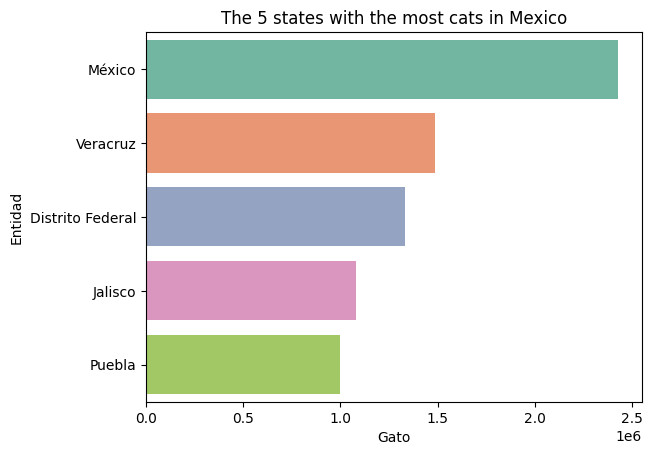

            Entidad     Gato
0            México  2428373
1          Veracruz  1483856
2  Distrito Federal  1333369
3           Jalisco  1079193
4            Puebla   999402


In [52]:
top5_cats = dTypes.groupby('Entidad')['Gato'].sum().nlargest(5).reset_index()
top5_cats_chart = sns.barplot(x='Gato', y='Entidad', hue='Entidad', data=top5_cats, palette='Set2', dodge=False, legend=False)
top5_cats_chart.set_title('The 5 states with the most cats in Mexico')
plt.show()
print(top5_cats)

The 5 states with the most cats in Mexico are shown

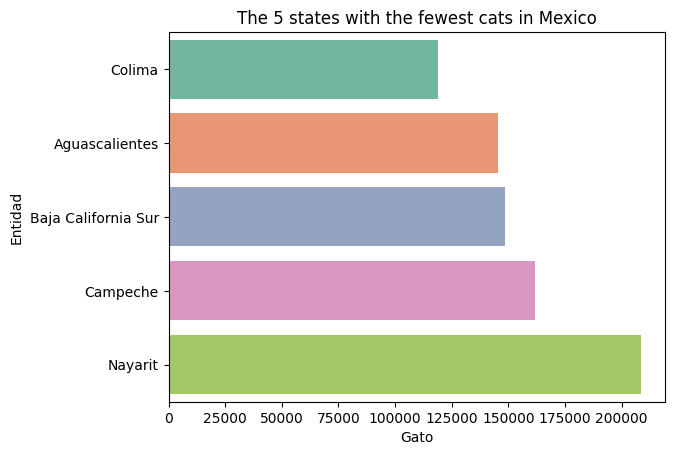

               Entidad    Gato
0               Colima  119132
1       Aguascalientes  145445
2  Baja California Sur  148293
3             Campeche  161582
4              Nayarit  208479


In [53]:
bottom5_cats = dTypes.groupby('Entidad')['Gato'].sum().nsmallest(5).reset_index()
bottom5_cats_chart = sns.barplot(x='Gato', y='Entidad', hue='Entidad', data=bottom5_cats, palette='Set2', dodge=False, legend=False)
bottom5_cats_chart.set_title('The 5 states with the fewest cats in Mexico')
plt.show()
print(bottom5_cats)

The 5 states with the fewest cats in Mexico are shown

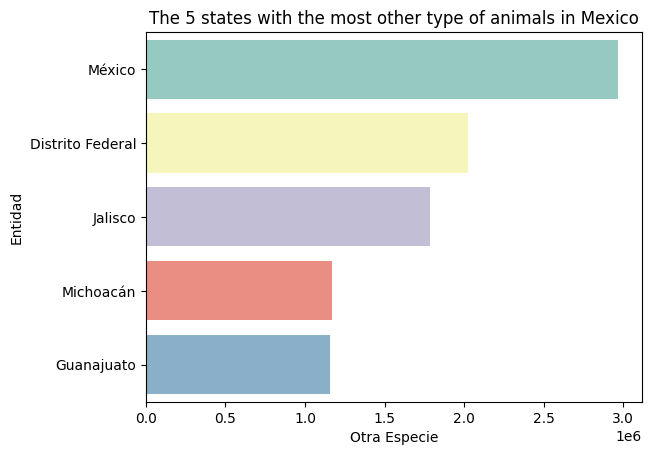

            Entidad  Otra Especie
0            México       2969425
1  Distrito Federal       2026476
2           Jalisco       1785147
3         Michoacán       1168286
4        Guanajuato       1156618


In [54]:
top5_other = dTypes.groupby('Entidad')['Otra Especie'].sum().nlargest(5).reset_index()
top5_other_chart = sns.barplot(x='Otra Especie', y='Entidad', hue='Entidad', data=top5_other, palette='Set3', dodge=False, legend=False)
top5_other_chart.set_title('The 5 states with the most other type of animals in Mexico')
plt.show()
print(top5_other)

The 5 states with the most other type of animals (hamsters, birds, fishes, etc.) in Mexico are shown

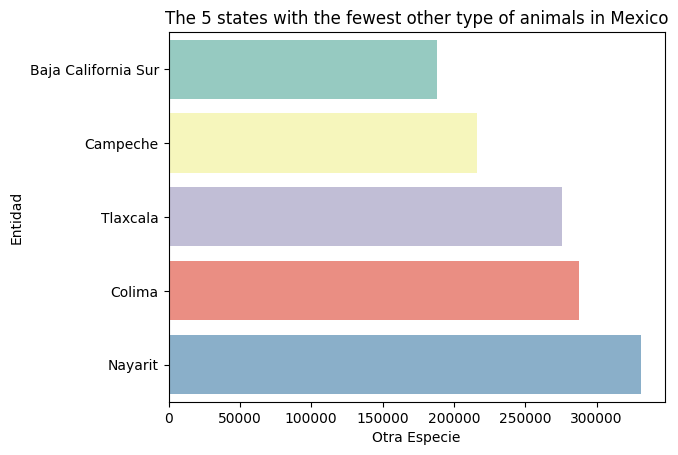

               Entidad  Otra Especie
0  Baja California Sur        188203
1             Campeche        216301
2             Tlaxcala        275664
3               Colima        287411
4              Nayarit        331083


In [55]:
bottom5_other = dTypes.groupby('Entidad')['Otra Especie'].sum().nsmallest(5).reset_index()
bottom5_other_chart = sns.barplot(x='Otra Especie', y='Entidad', hue='Entidad', data=bottom5_other, palette='Set3', dodge=False, legend=False)
bottom5_other_chart.set_title('The 5 states with the fewest other type of animals in Mexico')
plt.show()
print(bottom5_other)

The 5 states with the fewest other type of animals (hamsters, birds, fishes, etc.) in Mexico are shown

From what we know, cats and dogs are the most preferred animals by humans worldwide, so I took it upon myself to see if they were also popular here in Mexico or if people preferred other types of pets

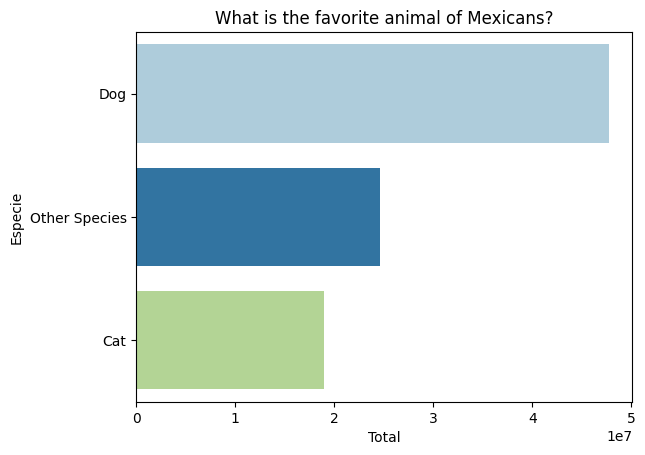

         Especie     Total
0            Dog  47711365
2  Other Species  24617509
1            Cat  18986535


In [56]:
total_each_animals = dTypes[['Perro', 'Gato', 'Otra Especie']].sum().reset_index()
total_each_animals.columns = ['Especie', 'Total']
total_each_animals['Especie'] = total_each_animals['Especie'].replace({'Perro': 'Dog', 'Gato': 'Cat', 'Otra Especie': 'Other Species'})
total_each_animals = total_each_animals.sort_values(by='Total', ascending=False)

favorite_animal_chart = sns.barplot(x='Total', y='Especie', hue='Especie', data=total_each_animals, palette='Paired', legend=False)
favorite_animal_chart.set_title('What is the favorite animal of Mexicans?')
plt.show()
print(total_each_animals)

In the results, we can observe that the favorite animal of Mexicans is the dog, and the one that is not as favored is the cat

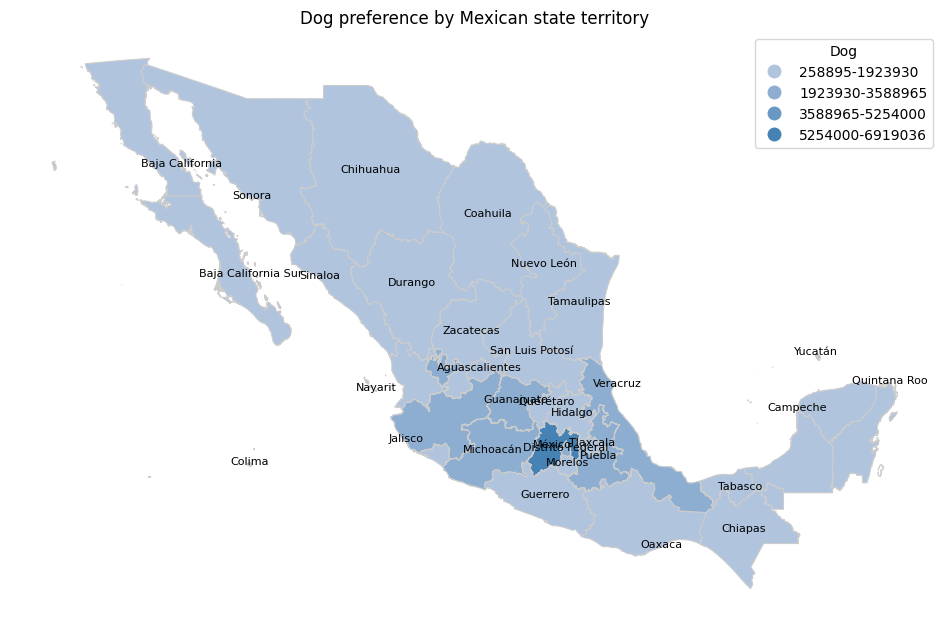

                Entidad    Perro
0                México  6919036
1              Veracruz  3176730
2      Distrito Federal  2932109
3                Puebla  2729657
4            Guanajuato  2586713
5               Jalisco  2494604
6             Michoacán  2000816
7                Oaxaca  1849569
8            Nuevo León  1719666
9               Chiapas  1596107
10             Guerrero  1595830
11      Baja California  1506073
12            Chihuahua  1416000
13           Tamaulipas  1395578
14              Hidalgo  1389670
15      San Luis Potosí  1287562
16               Sonora  1172107
17             Coahuila  1108456
18              Sinaloa   979647
19              Yucatán   970766
20            Querétaro   846200
21              Morelos   837343
22              Tabasco   822266
23         Quintana Roo   702139
24              Durango   640338
25            Zacatecas   569848
26             Tlaxcala   557058
27       Aguascalientes   469627
28             Campeche   421802
29        

In [57]:
# Cargar shapefile de estados de México
mexico = gpd.read_file(r'C:/Users/jjlof/Documents/Data Analyst/PetsInMexico/Python Data/Mapa de México/México.shp')

# Cargar datos de preferencia por perros
dTypes = pd.read_csv('C:/Users/jjlof/Documents/Data Analyst/PetsInMexico/Inegi/Mascotas_Tipo_2021_12_08.csv')

# Mantener solo las columnas necesarias (geometría y nombres)
mexico = mexico[['NOMBRE', 'geometry']]

# Combinar datos con el shapefile de México
mexico_merged = mexico.merge(dTypes, left_on='NOMBRE', right_on='Entidad', how='left')

# Renombrar columna 'Perro' a 'dog'
mexico_merged = mexico_merged.rename(columns={'Perro': 'dog'})

# Eliminar columnas innecesarias (si es necesario)
mexico_merged = mexico_merged[['NOMBRE', 'geometry', 'dog']]

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Crear un esquema de color personalizado utilizando bisque1 y bisque4
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colors", ["lightsteelblue", "steelblue"])

# Crear categorías para la leyenda
bins = np.linspace(mexico_merged['dog'].min(), mexico_merged['dog'].max(), 5)
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
mexico_merged['dog_bins'] = pd.cut(mexico_merged['dog'], bins=bins, labels=labels, include_lowest=True)

# Graficar los estados según la preferencia por perros
mexico_merged.plot(column='dog_bins', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, 
                   legend_kwds={'title': "Dog", 'loc': 'upper right'})

# Añadir etiquetas de nombres de estados sin duplicar
# Utilizar un diccionario para almacenar los centroides únicos
centroides = {}
for idx, row in mexico_merged.iterrows():
    centroid = row['geometry'].centroid
    centroides[row['NOMBRE']] = centroid

for estado, centroid in centroides.items():
    ax.text(centroid.x, centroid.y, estado, fontsize=8, ha='center')

# Añadir título y etiquetas
ax.set_title('Dog preference by Mexican state territory')
ax.set_axis_off()

# Mostrar el mapa
plt.show()

# Imprimir tabla ordenada por preferencia de perros
fd_chart = dTypes.sort_values(by='Perro', ascending=False).reset_index(drop=True)
print(fd_chart[['Entidad', 'Perro']])

Finally, Mexican states can be represented according to the density of canine population, using a color palette that ranges from those harboring a higher number of dogs, depicted in darker shades, to those with fewer dogs, represented in lighter tones.

## Conclusion

In the course of the analysis of animal preferences among people in Mexico, it can be concluded that the dog is the most preferred animal by a significant majority of individuals. This preference is reflected in a greater popularity and cultural acceptance of dogs as pets compared to other animals such as hamsters, birds, fish, and other animals. However, it is important to note that preference for other types of animals also exists, albeit to a lesser extent.

Lastly, although cats appear to occupy the last place in terms of preference, there is still a considerable population that chooses them as pets, indicating that there continues to be diversity in animal preferences among people in Mexico.

## References

I would like to thank the following websites that helped me with create my case:

-   Kaggle [Click here](https://www.kaggle.com)
-   INEGI [Click here](https://www.inegi.org.mx)
-   Posit [Click here](https://support.posit.co/hc/en-us)
-   Stack Overflow [Click here](https://stackoverflow.com)
